In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data exploration

In [21]:
df = pd.read_csv('credit_sample.csv')
df.head(2)

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default
0,16680574,2015-03-31,1.113874e+07,1.376687e+07,5.088808e+04,1.381694,1.480514,7.173578e+05,0.080700,1.261532e+06,...,1.781196,4.413310e+06,1.830489,1.703930e+06,0.742622,6.391379e+06,3.229780,2.983519e+06,3.077087e+06,0
1,96135545,2015-12-31,3.162025e+10,5.264251e+10,1.191007e+10,1.349057,-0.240472,1.696850e+09,0.463526,2.699133e+10,...,1.175688,-1.129475e+10,-0.225773,2.569705e+10,0.488350,-1.129475e+10,-0.393707,2.825408e+09,8.181468e+09,1


In [55]:
full_case = df.dropna().reset_index().drop(columns='index')
full_case.to_csv('data/full_case.csv')

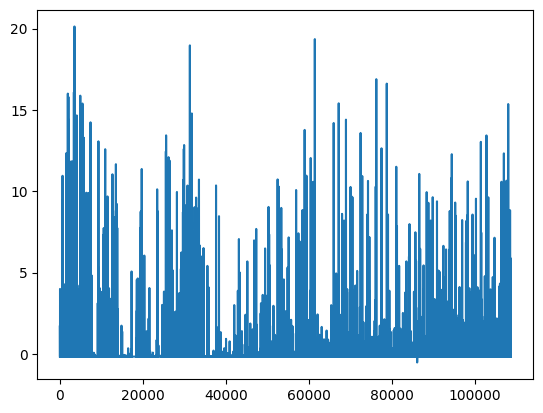

In [77]:
import numpy as np

def preprocess_data(df, col):
    df[col] = df[col] / 10e9
    df[col] = df[col] + abs(df[col].min()) + 1
    df[col] = np.log(df[col])
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    #df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())
    return df

xd = preprocess_data(full_case.copy(), 'Var_03')

plt.plot(xd.iloc[:, 4])

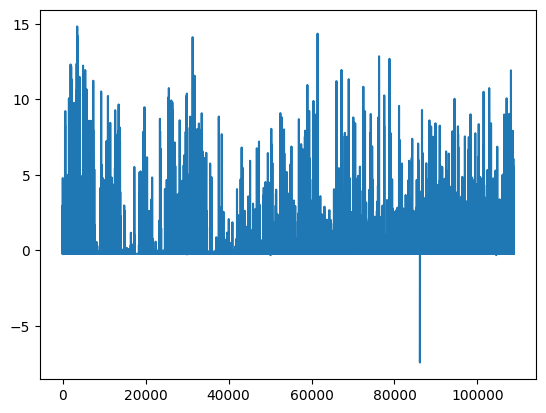

- Each observation is a client
- There can be multiple observations of individual clients, this is because the client is still a customer of a bank, mayby use it to code a variable that will provide information about long term customers.

In [22]:
df.groupby(['ID', 'obs_date'])['default'].sum().reset_index().head(2)

,ID,obs_date,default
0,1574,2015-12-31,0
1,1574,2016-12-31,0


## Missing values analysis

### Zero fill arguments:
- Var_01 - "Total current assets aggregated amount of all crash etc, these are classified as current assets if there is an expectation that tehy will be converted into cash within one year".
- Var_06 - "Impairment is unexpected damage, depreciation is expected wear and tear." From my understanding in this case we can fill missing values with zeros. If this represents some loss in value of company assets then 

In [28]:
df['Var_06'].value_counts()

0.000000e+00    515
2.932177e+06      1
2.287834e+07      1
2.659253e+07      1
2.306911e+07      1
               ... 
4.003315e+04      1
6.808129e+04      1
5.248333e+04      1
3.584644e+04      1
4.352037e+02      1
Name: Var_06, Length: 136130, dtype: int64

In [25]:
df.isna().sum()

ID              0
obs_date        0
Var_01        372
Var_02          0
Var_03       4347
Var_04       1224
Var_05       1408
Var_06      12285
Var_07          0
Var_08          0
Var_09          0
Var_10         47
Var_11         15
Var_12         61
Var_13        178
Var_14          0
Var_15          0
Var_16        372
Var_17       2140
Var_18          0
Var_19         15
Var_20      14299
Var_21       1039
Var_22          0
Var_23          0
Var_24          0
Var_25       1224
Var_26       4489
Var_27         54
Var_28       7816
Var_29          0
Var_30         19
Var_31         42
Var_32       1290
Var_33       1326
Var_34         47
Var_35        647
Var_36       1288
Var_37       1324
Var_38      13081
Var_39        283
default         0
dtype: int64

In [26]:
df

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default
0,16680574,2015-03-31,1.113874e+07,1.376687e+07,5.088808e+04,1.381694,1.480514,7.173578e+05,0.080700,1.261532e+06,...,1.781196,4.413310e+06,1.830489,1.703930e+06,0.742622,6.391379e+06,3.229780,2.983519e+06,3.077087e+06,0
1,96135545,2015-12-31,3.162025e+10,5.264251e+10,1.191007e+10,1.349057,-0.240472,1.696850e+09,0.463526,2.699133e+10,...,1.175688,-1.129475e+10,-0.225773,2.569705e+10,0.488350,-1.129475e+10,-0.393707,2.825408e+09,8.181468e+09,1
2,96135545,2017-12-31,4.362366e+10,7.431924e+10,1.368830e+10,1.276777,-0.250091,2.310428e+09,0.466883,3.555459e+10,...,1.091261,-1.245830e+10,-0.238898,3.375606e+10,0.513312,-1.245830e+10,-0.329019,4.073381e+09,9.456634e+09,0
3,96135545,2021-12-31,7.415145e+10,1.685034e+11,1.514736e+10,0.860113,0.112167,5.219493e+09,0.459297,5.080364e+10,...,0.723878,7.935362e+09,0.122707,2.388838e+10,0.636282,7.935362e+09,0.141644,7.684133e+09,-1.205984e+10,0
4,96135545,2018-12-31,4.217623e+10,7.909355e+10,1.116617e+10,1.090521,-0.208307,2.802609e+09,0.457592,3.373699e+10,...,1.009588,-1.079843e+10,-0.211018,3.334141e+10,0.532008,-1.079843e+10,-0.295527,4.824058e+09,3.500941e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148924,50036390,2020-12-31,9.856401e+04,1.013964e+05,1.014642e+04,6.425659,0.362302,8.737854e+02,0.131924,6.657380e+04,...,5.042210,2.374815e+04,0.298407,5.555275e+04,0.452123,2.374815e+04,0.352098,4.125691e+03,8.322488e+04,0
148925,15853756,2017-12-31,3.476749e+04,4.989166e+04,2.676141e+04,1.279394,-2.894691,-3.668688e+01,0.215534,6.679014e+04,...,6.207698,-2.676141e+04,-0.334267,7.708415e+03,0.845497,-2.676141e+04,-0.400899,2.377143e+03,7.592517e+03,0
148926,15853756,2016-12-31,9.395386e+03,1.316894e+04,8.052164e+03,0.646936,0.367477,4.352037e+02,0.076480,2.009101e+04,...,20.380253,-8.052164e+03,-0.351285,-1.962178e+04,2.490004,-8.052164e+03,-0.392287,0.000000e+00,-5.127524e+03,0
148927,91988808,2021-06-30,7.853617e+04,3.431528e+06,1.570044e+04,1.323897,-120.526693,NaN,-0.014040,-1.590527e+03,...,0.033013,3.372337e+06,-1199.692943,-1.583171e+04,1.004614,3.372337e+06,-2120.263607,3.529997e+04,1.921420e+04,0
